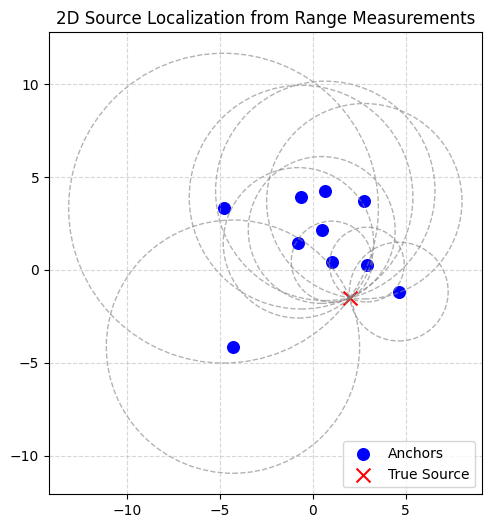

In [16]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

m = 10                
dim = 2              
x_true = np.array([2.0, -1.5])  

# Generate random anchor positions
a = np.random.uniform(-5, 5, (m, dim))

# Generate noise and corresponding range measurements
noise_std = 0
v = np.random.normal(0, noise_std, m)
rho = np.linalg.norm(a - x_true, axis=1) + v

# Plot setup
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)

# Plot anchors
ax.scatter(a[:, 0], a[:, 1], c='blue', label='Anchors', s=70)

# Plot true source
ax.scatter(*x_true, c='red', label='True Source', s=100, marker='x')

# Draw circles for ranges
for i in range(m):
    circle = plt.Circle(a[i], rho[i], color='gray', fill=False, linestyle='--', alpha=0.6)
    ax.add_patch(circle)

ax.legend()
ax.set_title("2D Source Localization from Range Measurements")
plt.show()

In [17]:
import cvxpy as cp

x = cp.Variable(2)
t = cp.Variable(m)

constraints = []
for i in range(m):
    constraints.append(t[i] - cp.sqrt(cp.sum_squares(x - a[i])) == 0)

objective = cp.Minimize(cp.sum_squares(t - rho))
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.IPOPT, nlp=True, verbose=True, derivative_test='none',
              least_square_init_duals='no')


(CVXPY) Nov 03 11:49:44 AM: Your problem has 12 variables, 10 constraints, and 0 parameters.
(CVXPY) Nov 03 11:49:44 AM: It is compliant with the following grammars: 
(CVXPY) Nov 03 11:49:44 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 03 11:49:44 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 03 11:49:44 AM: Your problem is compiled with the CPP canonicalization backend.


                                     CVXPY                                     
                             v1.7.0.dev0+0.5870139                             
This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      110
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       40

Total number of variables............................:       52
                     variables with only lower bounds:       10
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       50
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:  

4.9423316500670726e-18

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  4.9423315e-18 1.91e-09 1.82e-09 -11.0 5.35e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 30

                                   (scaled)                 (unscaled)
Objective...............:   4.9423315266692975e-18    4.9423315266692975e-18
Dual infeasibility......:   1.8168919927994380e-09    1.8168919927994380e-09
Constraint violation....:   1.9089272385031109e-09    1.9089272385031109e-09
Complementarity.........:   1.0000102221354787e-11    1.0000102221354787e-11
Overall NLP error.......:   1.9089272385031109e-09    1.9089272385031109e-09


Number of objective function evaluations             = 34
Number of objective gradient evaluations             = 31
Number of equality constraint evaluations            = 34
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 31
Number of inequality constraint Jacobian evaluations = 0
Num

In [18]:
print("\nEstimated position x_est:\n", x.value)
print("True position x_true:\n", x_true)


Estimated position x_est:
 [ 2.  -1.5]
True position x_true:
 [ 2.  -1.5]
